In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import nltk

from nlu_engine import NLUEngine
from nlu_engine import MacroDataRefinement
from nlu_engine import MacroEntityRefinement

from nlu_engine import DataUtils
from nlu_engine import RenderJSON

from nlu_engine import Analytics

from nlu_engine import EntityExtractor, crf

# Macro NLU Data Refinement

It's a bit like the TV show [Serverance](https://www.imdb.com/title/tt11280740/) .

![Helly R and Mark S](https://media.npr.org/assets/img/2022/02/15/atv_severance_photo_010103-5f8033cc2b219ba64fe265ce893eae4c90e83896-s1100-c50.jpg "Helly R and Mark G")

*Helly R*: `My job is to scroll through the spreadsheet and look for the numbers that feel scary?`

*Mark S*: `I told you, you’ll understand when you see it, so just be patient.`

![MDR](https://www.imore.com/sites/imore.com/files/styles/large/public/field/image/2022/03/refinement-software-severance-apple-tv.jpg "serverance micro data refinement")

*Helly R*: `That was scary. The numbers were scary.`

Hopefully the intents and entities that are wrong aren't scary, just a bit frustrating. Let's see if we can find the right ones.

NOTE: We will use Logistic Regression with TFIDF features to train our intent models and CRFs for entity exraction. Why? Well, they are very fast and both methods aren't state-of-the-art. This is good, because it is easier to find problems we will need to refine in the dataset than if we were to use a proper NLU engine like Snips or something SOTA like BERT. It is very important to note that some of the the problems we will pick up on, might not be an actual issue, but might be due to the limitations of the models. Refining the real problems and ignoring the limitations of the models is a good way to improve the models. Then when the dataset is ready, we can use some more advanced NLU engine and get the best performance possible.

* Macro NLU Data Refinement: Intent
* Macro NLU Data Refinement: Entity


Load the dataset

In [3]:
try:
    nlu_data_df = pd.read_csv(
        'data/refined/nlu_data_refined_df.csv', sep=',', index_col=0)
    print('Successfully loaded nlu_data_refined_df.csv')
except:
    data = 'data/NLU-Data-Home-Domain-Annotated-All-Cleaned.csv'
    nlu_data_df = DataUtils.load_data(
    data
)

Successfully loaded nlu_data_refined_df.csv


In [ ]:
# TODO: Remove this when done.It's just for testing!
data = 'data/NLU-Data-Home-Domain-Annotated-All-Cleaned.csv'
nlu_data_df = DataUtils.load_data(
    data
)

Make sure `nlu_data_df['answer_normalised']` is taken from `nlu_data_df['answer_annotation']`

In [4]:
nlu_data_df = DataUtils.convert_annotated_utterances_to_normalised_utterances(
    nlu_data_df)


In [ ]:
#TODO: does this NEED to be here, LOL!
from matplotlib.pyplot import axis


We should remove the unwanted entries for the next few steps.

In [5]:
removed_nlu_data_refined_df = nlu_data_df[nlu_data_df['remove'] != True]

# Entity extraction report

The entity extraction could be greatly improved by improving the features it uses. It would be great if someone would take a look at this. Perhaps the CRF features similar to what Snips uses would be better such as Brown clustering (probably).

In [ ]:
#TODO: implement brown clustering to improve entity extraction (see entity_extractor.py)

It is important to have the NLTK tokenizer to be able to extract entities.

In [ ]:
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
        nltk.download('punkt')

Due to this error featured in [this git issue](https://github.com/TeamHG-Memex/sklearn-crfsuite/issues/60) we have to use an older version of scikit learn (sklearn<0.24), otherwise the latest version would work. Hopefully this gets fixed one day..

In [6]:
entity_report_df = NLUEngine.evaluate_entity_classifier(
    data_df=removed_nlu_data_refined_df, cv=4)

Evaluating entity classifier
Cross validating with CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Time it took to cross validate CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100): 279.7219412326813


/home/bartmoss/code/NLU-engine-prototype-benchmarks/.venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
entity_report_df

,entity-type,precision,recall,f1-score,support
0,0,0.875369,0.953684,0.912850,64449.000000
1,alarm_type,0.000000,0.000000,0.000000,26.000000
2,app_name,0.878788,0.460317,0.604167,63.000000
3,artist_name,0.350877,0.285714,0.314961,560.000000
4,audiobook_author,0.000000,0.000000,0.000000,22.000000
5,audiobook_name,0.000000,0.000000,0.000000,235.000000
6,business_name,0.319149,0.153374,0.207182,489.000000
7,business_type,0.605714,0.305476,0.406130,347.000000
8,change_amount,0.000000,0.000000,0.000000,150.000000
9,coffee_type,1.000000,0.155556,0.269231,45.000000


Let's have a look at the report plotted for us

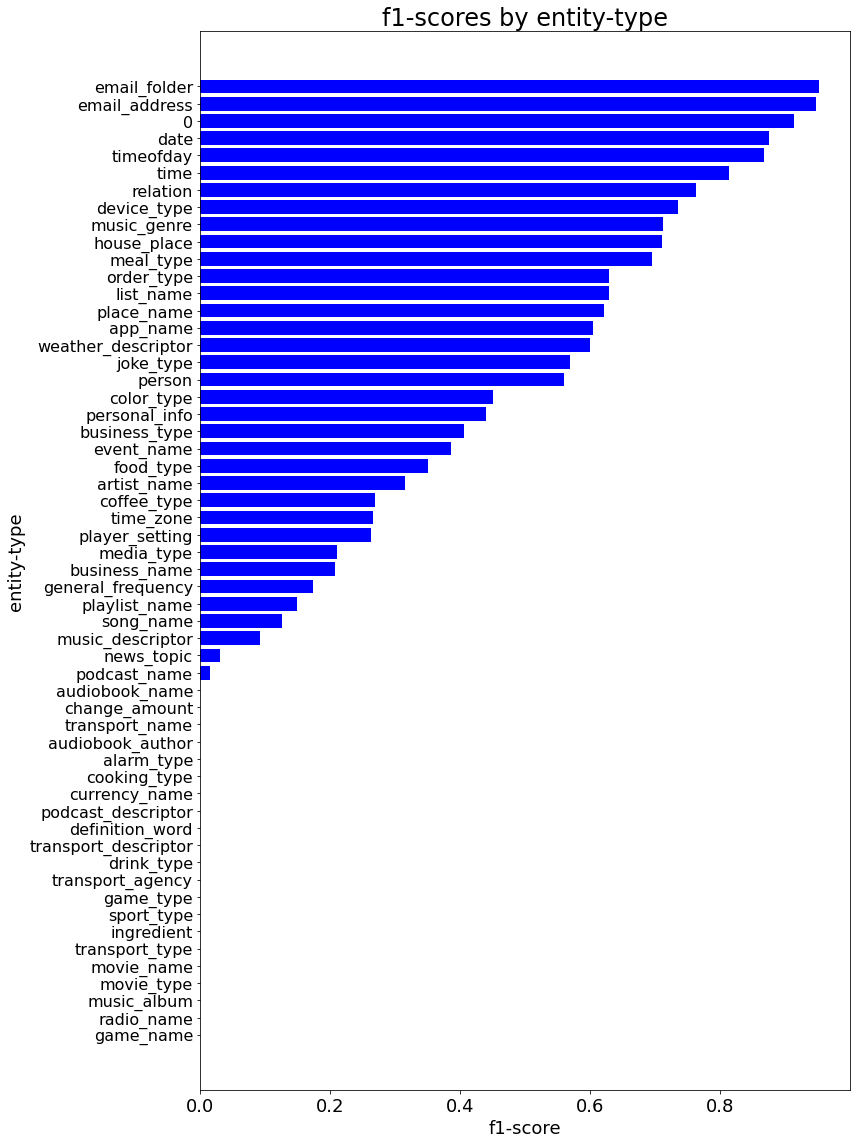

In [8]:
Analytics.plot_report(entity_report_df)

We will need to extract out the entity types from the dataset. We need this to calculate the precentage of entities, to filter out any domains that have too few entities for benchmarking by domain instead of all domains together.

In [9]:
removed_nlu_data_refined_df['entities'] = removed_nlu_data_refined_df['answer_annotation'].apply(
    EntityExtractor.extract_entities)

/home/bartmoss/code/NLU-engine-prototype-benchmarks/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
removed_nlu_data_refined_df['entity_types'] = removed_nlu_data_refined_df['entities'].apply(
    EntityExtractor.extract_entity_types)

/home/bartmoss/code/NLU-engine-prototype-benchmarks/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#TODO: add this as a method to the entity extractor class (should I still do this? YES!)

In [11]:
import numpy as np
removed_nlu_data_refined_df['entity_types'] = removed_nlu_data_refined_df['entity_types'].apply(lambda y: np.nan if len(y)==0 else y)
removed_nlu_data_refined_df['entities'] = removed_nlu_data_refined_df['entities'].apply(lambda y: np.nan if len(y)==0 else y)

/home/bartmoss/code/NLU-engine-prototype-benchmarks/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/bartmoss/code/NLU-engine-prototype-benchmarks/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
removed_nlu_data_refined_df

In [ ]:
#TODO: update the notebook to use this method instead
#TODO: use evaulation to get a better understanding of the data
#TODO: refine entities from domains as individual entities

In [12]:
domain_entity_reports_df = NLUEngine.get_entity_reports_for_domains(removed_nlu_data_refined_df)

Evaluating entity classifier for alarm
Evaluating entity classifier
Cross validating with CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/bartmoss/code/NLU-engine-prototype-benchmarks/.venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bartmoss/code/NLU-engine-prototype-benchmarks/nlu_engine/main.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Time it took to cross validate CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100): 0.8272426128387451
Evaluating entity classifier for audio
Evaluating entity classifier
Cross validating with CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100)
Time it took to cross validate CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100): 0.1271662712097168
Evaluating entity classifier for iot
Evaluating entity classifier
Cross validating with CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100)
Time it took to cross validate CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100): 1.35011887550354
Evaluating entity classifier for calendar
Evaluating entity classifier
Cross validating with CRF

In [ ]:
domain_entity_reports_df

In [13]:
domain_entity_reports_df = domain_entity_reports_df[domain_entity_reports_df['entity-type'].str.contains(
    'weighted avg')].sort_values(by='f1-score', ascending=True)

In [ ]:
domain_entity_reports_df

In [14]:
import matplotlib.pyplot as plt

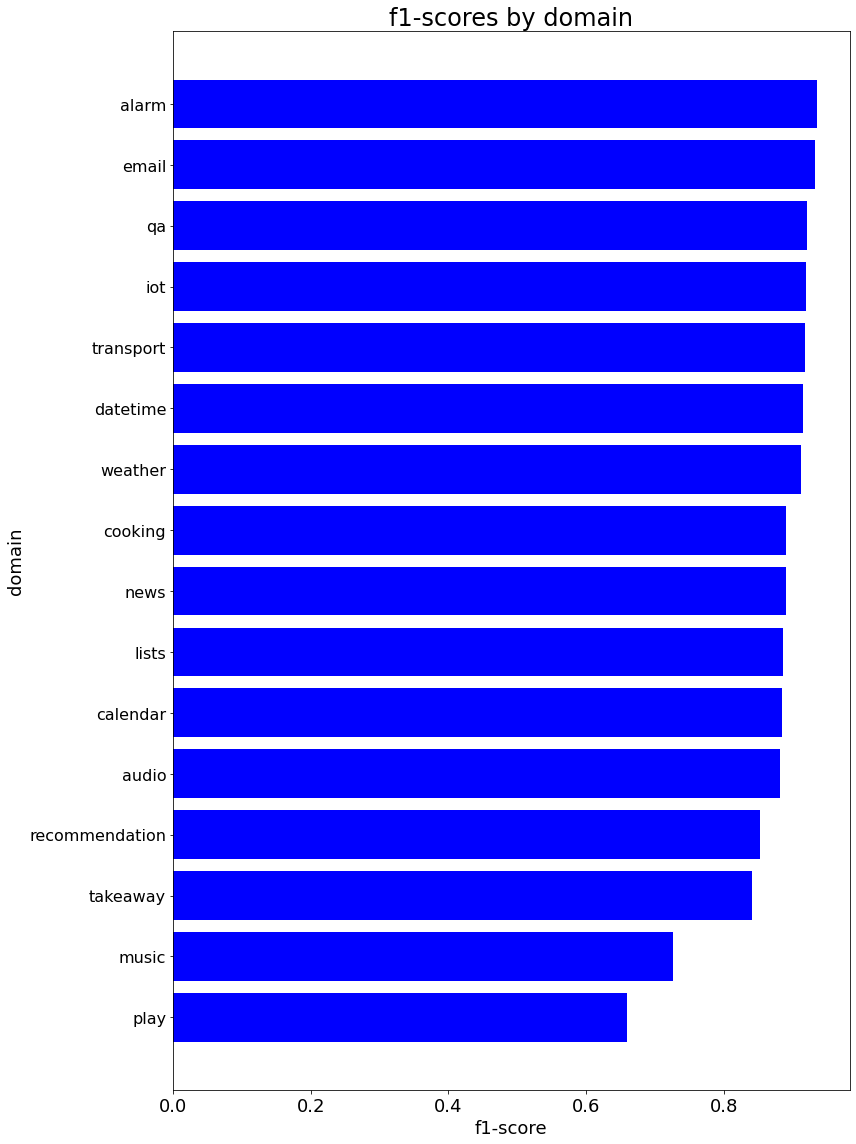

In [15]:
#TODO: rename plot_report to plot_intent_report and this code below should be a method called plot_entity_report
label = domain_entity_reports_df.columns[5]

fig, ax = plt.subplots()
graph_report_df = domain_entity_reports_df.sort_values(
            by='f1-score', ascending=True)
y_axis = np.arange(len(graph_report_df[label]))

ax.barh(y_axis, graph_report_df['f1-score'],
        align='center', color='b')

fig.set_figheight(16)
fig.set_figwidth(12)

ax.set_title(f'f1-scores by {label}', fontsize=24)
ax.set_xlabel("f1-score", fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.set_ylabel(label, fontsize=18)
ax.set_yticks(y_axis, graph_report_df[label], fontsize=16)
fig.tight_layout()

In [ ]:
#TODO: load saved model
#TODO: compare the create_entity_tagged_utterance with the annotated_utterance for what doesn't match
#TODO: Get diff between annotated_utterance and create_entity_tagged_utterance
#TODO: Extract out the entity types that are different from the annotated_utterance
#TODO: Get percentage of failure by entity and graph them

If you don't already have a saved model (for the default data set there is already one), you can train a model and save it.

In [ ]:
crf_model = NLUEngine.train_entity_classifier(removed_nlu_data_refined_df)

In [ ]:
model_path = 'models/analytics/entity_tagger.sav'

In [ ]:
DataUtils.pickle_model(classifier=crf_model, model_path=model_path)

You can open it from here.

In [16]:
model_path = 'models/analytics/entity_tagger.sav'

In [17]:
crf_model = DataUtils.import_pickled_model(model_path)

Now, let's run it across our data set to get the `predicted_tagging`.

In [18]:
removed_nlu_data_refined_df['predicted_tagging'] = removed_nlu_data_refined_df['answer_normalised'].apply(
    lambda x: NLUEngine.create_entity_tagged_utterance(x, crf_model))

/home/bartmoss/code/NLU-engine-prototype-benchmarks/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
removed_nlu_data_refined_df

We can now load a dataset of all of the incorrectly predicted entities.

In [19]:
incorrect_predicted_entities_df = removed_nlu_data_refined_df[removed_nlu_data_refined_df['answer_annotation']
                            != removed_nlu_data_refined_df['predicted_tagging']]

In [ ]:
incorrect_predicted_entities_df

In [ ]:
# TODO: have user choose a domain, make report about entities in the domain,...
# TODO: after the report, does the user clean all entities in the domain at once, or by individual entity type?
# TODO: review from here below, this code is a bit older than the above code

In [20]:
domain_selection = MacroDataRefinement.list_and_select_domain(
    removed_nlu_data_refined_df)

In [21]:
domain_df = DataUtils.get_domain_df(
    removed_nlu_data_refined_df, domain_selection)

Successfully loaded dataframe


In [26]:
domain_df

,question,answer_normalised,scenario,intent,predicted_label,answer_annotation,entities,entity_types,predicted_tagging
0,Write what you would tell your PDA in the foll...,wake me up at five am this week,alarm,alarm_set,alarm_set,wake me up at [time : five am] [date : this week],"[{'type': 'time', 'words': ['five', 'am']}, {'...","time,date",wake me up at [time : five am] [date : this week]
1,Write what you would tell your PDA in the foll...,wake me up at nine am on friday,alarm,alarm_set,alarm_set,wake me up at [time : nine am] on [date : friday],"[{'type': 'time', 'words': ['nine', 'am']}, {'...","time,date",wake me up at [time : nine am] on [date : friday]
2,Write what you would tell your PDA in the foll...,set an alarm for two hours from now,alarm,alarm_set,alarm_set,set an alarm for [time : two hours from now],"[{'type': 'time', 'words': ['two', 'hours', 'f...",time,set an alarm for [time : two hours from now]
42,Write what you would tell your PDA in the foll...,cancel my seven am alarm,alarm,alarm_remove,alarm_remove,cancel my [time : seven am] alarm,"[{'type': 'time', 'words': ['seven', 'am']}]",time,cancel my [time : seven am] alarm
43,Write what you would tell your PDA in the foll...,remove the alarm set for ten pm,alarm,alarm_remove,alarm_remove,remove the alarm set for [time : ten pm],"[{'type': 'time', 'words': ['ten', 'pm']}]",time,remove the alarm set for [time : ten pm]
...,...,...,...,...,...,...,...,...,...
10720,Write what you would tell your PDA in the foll...,make an alarm for five pm on tuesday,alarm,alarm_set,alarm_set,make an alarm for [time : five pm] on [date : ...,"[{'type': 'time', 'words': ['five', 'pm']}, {'...","time,date",make an alarm for [time : five pm] on [date : ...
10721,Write what you would tell your PDA in the foll...,alarm five pm tuesday,alarm,alarm_set,alarm_set,alarm [time : five pm] [date : tuesday],"[{'type': 'time', 'words': ['five', 'pm']}, {'...","time,date",alarm [time : five pm] [date : tuesday]
10722,Write what you would tell your PDA in the foll...,set my calendar for an alarm at five pm tuesday,alarm,alarm_set,alarm_set,set my calendar for an alarm at [time : five p...,"[{'type': 'time', 'words': ['five', 'pm']}, {'...","time,date",set my calendar for an alarm at [time : five p...
10727,Write what you would tell your PDA in the foll...,set an alarm for four pm tuesday,alarm,alarm_set,alarm_set,set an alarm for [time : four pm] [date : tues...,"[{'type': 'time', 'words': ['four', 'pm']}, {'...","time,date",set an alarm for [time : four pm] [date : tues...


In [28]:
#TODO remove this, it's just for testing
from sklearn.metrics import f1_score


def get_incorrect_predicted_entities_report(domain_df, entity_report_df, domain_entity_reports_df):
    """
        Get a report of the incorrectly predicted entities
        :param nlu_domain_df: pandas dataframe
        :param incorrect_intent_predictions_df: pandas dataframe
        :return: pandas dataframe
        """
    domain_selection = domain_df['scenario'].unique().tolist()[0]
    entity_types_df = domain_df.dropna(subset=['entity_types'])
    entries = entity_types_df['entity_types'].apply(
        lambda x: x.split(',')).to_list()

    domain_entity_types = set(sum(entries, []))

    domain_f1_score = domain_entity_reports_df[
        domain_entity_reports_df['domain'] == domain_selection
        ]['f1-score'].values[0]

    print(f'Domain: {domain_selection}\nf1-score: {domain_f1_score}')

    for entity_type in domain_entity_types:
        entity_entries_df = entity_types_df[
            entity_types_df['entity_types'].str.contains(entity_type)
            ]
        correct_entries_df = entity_entries_df[
            entity_entries_df['answer_annotation'] == entity_entries_df['predicted_tagging']
            ]
        
        try:
            correct_utterance_example = correct_entries_df['answer_annotation'].iloc[0]
        except:
            correct_utterance_example = 'There are no correct utterances!'

        f1_score = entity_report_df[
            entity_report_df['entity-type'] == entity_type
            ]['f1-score'].values[0]
        
        print(
            f'entity type: {entity_type}\nf1-score: {f1_score}\n correct utterance: {correct_utterance_example}'
            )

In [29]:
get_incorrect_predicted_entities_report(
    domain_df, entity_report_df, domain_entity_reports_df)

Domain: alarm
f1-score: 0.9361307738051181
entity type: general_frequency
f1-score: 0.17391304347826086
 correct utterance: set alarm for [time : eight] [general_frequency : every weekday]
entity type: timeofday
f1-score: 0.8678304239401496
 correct utterance: confirm alarm for [date : tomorrow] [timeofday : morning]
entity type: event_name
f1-score: 0.3860614397065566
 correct utterance: please remove the alarm set for [date : wednesday] called [event_name : kickball]
entity type: alarm_type
f1-score: 0.0
 correct utterance: please ring the [alarm_type : wake up] alarm at [time : eight am] next [date : saturday]
entity type: date
f1-score: 0.8751160631383472
 correct utterance: wake me up at [time : five am] [date : this week]
entity type: person
f1-score: 0.5597667638483966
 correct utterance: make an alarm for the [event_name : meeting] with [person : bob] at [time : seven] [date : today]
entity type: house_place
f1-score: 0.7112375533428166
 correct utterance: what alarms are set i

In [22]:
#TODO: check out why this doesn't work from the class but works from the function below!
incorrect_predicted_entities_report = MacroEntityRefinement.get_incorrect_predicted_entities_report(
    domain_df, entity_report_df, domain_entity_reports_df)

#TODO: Have user go through refinement in batches of 100 or less per domain


Domain: alarm
f1-score: 0.9361307738051181
Entity type: house_place
Correct entities: 1
Incorrect entities: 0
Total entities: 1
entity type: house_place
f1-score: 0.7112375533428166
 correct utterance: what alarms are set in the [house_place : house]
Entity type: person
Correct entities: 1
Incorrect entities: 1
Total entities: 2
entity type: person
f1-score: 0.5597667638483966
 correct utterance: make an alarm for the [event_name : meeting] with [person : bob] at [time : seven] [date : today]
Entity type: alarm_type
Correct entities: 11
Incorrect entities: 2
Total entities: 13
entity type: alarm_type
f1-score: 0.0
 correct utterance: please ring the [alarm_type : wake up] alarm at [time : eight am] next [date : saturday]
Entity type: general_frequency
Correct entities: 3
Incorrect entities: 0
Total entities: 3
entity type: general_frequency
f1-score: 0.17391304347826086
 correct utterance: set alarm for [time : eight] [general_frequency : every weekday]
Entity type: date
Correct entiti

In [30]:
def get_incorrect_predicted_entities_report(domain_df, entity_report_df, domain_entity_reports_df):
    """
        Get a report of the incorrectly predicted entities
        :param nlu_domain_df: pandas dataframe
        :param incorrect_intent_predictions_df: pandas dataframe
        :return: pandas dataframe
        """

    incorrect_predicted_entities_report = {}
    
    domain_selection = domain_df['scenario'].unique().tolist()[0]
    entity_types_df = domain_df.dropna(subset=['entity_types'])
    entries = entity_types_df['entity_types'].apply(
        lambda x: x.split(',')).to_list()

    domain_entity_types = set(sum(entries, []))

    domain_f1_score = domain_entity_reports_df[
        domain_entity_reports_df['domain'] == domain_selection
    ]['f1-score'].values[0]

    print(f'Domain: {domain_selection}\nf1-score: {domain_f1_score}')

    for entity_type in domain_entity_types:
        entity_entries_df = entity_types_df[
            entity_types_df['entity_types'].str.contains(entity_type)
        ]
        correct_entries_df = entity_entries_df[
            entity_entries_df['answer_annotation'] == entity_entries_df['predicted_tagging']
        ]

        incorrect_entries_df = entity_entries_df[
            entity_entries_df['answer_annotation'] != entity_entries_df['predicted_tagging']
        ]

        incorrect_entities_count = len(incorrect_entries_df.index)
        correct_entities_count = len(correct_entries_df.index)
        total_entities_count = len(entity_entries_df.index)
        print(f'Entity type: {entity_type}')
        print(f'Correct entities: {correct_entities_count}')
        print(f'Incorrect entities: {incorrect_entities_count}')
        print(f'Total entities: {total_entities_count}')

        try:
            correct_utterance_example = correct_entries_df['answer_annotation'].iloc[0]
        except:
            correct_utterance_example = 'There are no correct utterances!'

        try:
            incorrect_utterance_example = incorrect_entries_df['answer_annotation'].iloc[0]
        except:
            incorrect_utterance_example = 'There are no incorrect utterances!'

        f1_score = entity_report_df[
            entity_report_df['entity-type'] == entity_type
        ]['f1-score'].values[0]

        print(
            f'entity type: {entity_type}\nf1-score: {f1_score}\n correct utterance: {correct_utterance_example}'
        )


        incorrect_predicted_entities_report[entity_type] = {
            'f1-score': f1_score,
            'total_count': total_entities_count,
            'total_incorrect_count': incorrect_entities_count,
            'correct utterance': correct_utterance_example,
            'incorrect utterance': incorrect_utterance_example
        }
    return incorrect_predicted_entities_report

In [31]:
incorrect_predicted_entities_report = get_incorrect_predicted_entities_report(
    domain_df, entity_report_df, domain_entity_reports_df)


Domain: alarm
f1-score: 0.9361307738051181
Entity type: general_frequency
Correct entities: 3
Incorrect entities: 0
Total entities: 3
entity type: general_frequency
f1-score: 0.17391304347826086
 correct utterance: set alarm for [time : eight] [general_frequency : every weekday]
Entity type: timeofday
Correct entities: 37
Incorrect entities: 30
Total entities: 67
entity type: timeofday
f1-score: 0.8678304239401496
 correct utterance: confirm alarm for [date : tomorrow] [timeofday : morning]
Entity type: event_name
Correct entities: 11
Incorrect entities: 10
Total entities: 21
entity type: event_name
f1-score: 0.3860614397065566
 correct utterance: please remove the alarm set for [date : wednesday] called [event_name : kickball]
Entity type: alarm_type
Correct entities: 11
Incorrect entities: 2
Total entities: 13
entity type: alarm_type
f1-score: 0.0
 correct utterance: please ring the [alarm_type : wake up] alarm at [time : eight am] next [date : saturday]
Entity type: date
Correct ent

In [23]:
RenderJSON(incorrect_predicted_entities_report)

#TODO: check for overlap between the entity words and their entity types.
# Entity words should be unique to each entity type (as much as possible) in a domain.

## Entity overlap refinement
We want to find the entities that have overlapping entity types. Entities (the words themselves that get tagged), should very rarely have more than one entity type in a domain. If they do, then we need to refine the dataset.

take the `domain_df['entities']` and get a list of dictionaries for:
* `id`: the original index of the row
* `entity_type`: the entity type
* `entity_words`: the joined words with spaces that make up the entity

and then drop it into a dataframe

In [59]:
#TODO: this will be turned into a function and put into a class for the macro entity refinement
output_list = []
for index, row in domain_df.iterrows():
        if row['entities'] is not np.nan:
            for entity in row['entities']:
                entry_entity_dictionary = {}
                entry_entity_dictionary['id'] = index
                entry_entity_dictionary['entity_type'] = entity['type']
                entry_entity_dictionary['entity_words'] = " ".join(entity['words'])
                output_list.append(entry_entity_dictionary)
        else:
            entry_entity_dictionary = {}
            entry_entity_dictionary['id'] = index
            entry_entity_dictionary['entity_type'] = None
            entry_entity_dictionary['entity_words'] = None
            output_list.append(entry_entity_dictionary)

entity_type_words_df = pd.DataFrame(output_list)


In [128]:
entity_type_words_df


,id,entity_type,entity_words
0,0,time,five am
1,0,date,this week
2,1,time,nine am
3,1,date,friday
4,2,time,two hours from now
...,...,...,...
710,10722,time,five pm
711,10722,date,tuesday
712,10727,time,four pm
713,10727,date,tuesday


On the `entity_type_words_df` we will want to get the `entity_words` which multiple entries. Why don't we also count the number of times it appears?

In [135]:
# return all rows where the entity_words are one of the entity_words in duplicated:
all_entity_words = entity_type_words_df["entity_words"]
entity_type_word_counts_df = entity_type_words_df[all_entity_words.isin(all_entity_words[all_entity_words.duplicated(
)])].sort_values(by=['entity_words']).groupby(['entity_words', 'entity_type']).count()

In [178]:
entity_type_word_counts_df

id
entity_words            entity_type          
Thursday                date                2
Wednesday               date                2
eight                   time                3
eight am                time               24
eight pm                time                4
evening                 timeofday           3
every morning           general_frequency   1
                        timeofday           1
everyday                date                2
five                    time                5
five am                 time               19
five hundred and thirty time                3
five pm                 time               10
four                    time                2
four am                 time                7
four pm                 time                2
friday                  date                3
meeting                 event_name          6
monday                  date                3
morning                 timeofday          54
nine                    time                2
nine am                 time                9
nine pm                 time                4
noon                    timeofday           4
one hour                time                2
one pm                  time                2
saturday                date                5
seven                   time                2
seven am                time               20
seven pm                time                3
seven thirty am         time                4
six                     time                6
six am                  time               35
six thirty              time                2
six thirty am           time                3
soccer practice         alarm_type          1
                        event_name          1
sunday                  date                5
ten                     time                6
ten am                  time               11
ten pm                  time                2
thirty minutes          time                3
this evening            timeofday           2
this week               date                3
three pm                time                4
thursday                date                3
today                   date               24
tomorrow                date               71
tomorrow's              date                2
tuesday                 date                9
twelve pm               time                2
two hours               time                2
two hours from now      time                2
two pm                  time                2
wake up                 alarm_type         10
wednesday               date                3
weekdays                date                2
weekends                time                2
whole week              time                2

This part is a bit silly, but it works. We want to unstack the `entity_type_word_df` and then `dropna` on all of the columns with a threshold of 2. This will leave us with the `entity_words` that have more than one entity type and the `entity_type` that they have.

There has to be a better way to do all of this, right? Right? LOL

In [179]:
overlapping_entities_df = pd.DataFrame(entity_type_word_counts_df).unstack().dropna(thresh=2)
overlapping_entities_df
#TODO: refinement: output this information nicely, and then have users select which entity_type they want for each entity_words.
# Then we will have gotten rid of the overlap!
#TODO: do a refinement on the rest of the entity words to make sure they are going to the right place.
#TODO: retrain the model and see if the results improve.
#TODO: do the refinement on all of the incorrect predicted entities that remain by reviewing the utterance with tagging.
#TODO: repeat for all of the domains.


id                                                 
entity_type     alarm_type date event_name general_frequency time timeofday
entity_words                                                               
every morning          NaN  NaN        NaN               1.0  NaN       1.0
soccer practice        1.0  NaN        1.0               NaN  NaN       NaN

We need the `overlapping_entity_words` themselves so we can pull an `isin` to get them all by their original `index` in `entity_type_word_df`.

But really, there has to be a better way than this!

In [144]:
overlapping_entity_words =  pd.DataFrame(overlapping_entities_df.id).index.values

In [146]:
overlapping_entity_words_df = entity_type_words_df[entity_type_words_df['entity_words'].isin(overlapping_entity_words)]

overlapping_entity_words_df = overlapping_entity_words_df.sort_values(by=[
    'entity_words'])


How about a little prototype of the function we will make in the class to prompt the user on the refinement?

In [156]:
print("For the following entity words, please select the correct entity type.")
correct_entity_types = []
for entity_word in overlapping_entity_words:
    print(f'entity words: {entity_word}')
    print(
        f'entity types: {overlapping_entity_words_df[overlapping_entity_words_df["entity_words"] == entity_word]["entity_type"].values}')
    correct_entity_type = input("Type in the correct entity type")
    correct_entity_types.append(correct_entity_type)
    #TODO: This isn't right, it should apply it to the domain_df in the annotated column and save the domain_df to a csv.
    #overlapping_entity_words_df.loc[overlapping_entity_words_df['entity_words'] == entity_word, 'entity_type'] = correct_entity_type
    #TODO: for entity_word in overlapping_entity_words_df, get the ids
    overlapping_by_id = overlapping_entity_words_df[overlapping_entity_words_df['entity_words'] == entity_word]['id'].values
    overlapping_by_id


For the following entity words, please select the correct entity type.
entity words: every morning
entity types: ['timeofday' 'general_frequency']
entity words: soccer practice
entity types: ['alarm_type' 'event_name']


We have the `overlapping_by_id` which we will need to find the entries we want to change in `domain_df`.

In [ ]:
overlapping_by_id

We have the `correct_entity_types`. We will need those to know what to change the `entity_type` to.

In [160]:
correct_entity_types

['timeofday', 'event_name']

We should probably get a list of the `incorrect_entity_types` to go along with our `correct_entity_types`, so we know what to replace.

In [158]:
incorrect_entity_types = []
for entity_type in overlapping_entity_words_df['entity_type'].values:
    if entity_type not in correct_entity_types:
        incorrect_entity_types.append(entity_type)

In [159]:
incorrect_entity_types

['alarm_type', 'general_frequency']

Now we can get out `overlapping_domain_df`.

In [175]:
overlapping_domain_df = domain_df[domain_df.index.isin(
    overlapping_by_id)]
overlapping_domain_df

,question,answer_normalised,scenario,intent,predicted_label,answer_annotation,entities,entity_types,predicted_tagging
5797,How would you ask your PDA to remove an alarm ...,cancel all soccer practice alarms,alarm,alarm_remove,commandstop,cancel all [alarm_type : soccer practice] alarms,"[{'type': 'alarm_type', 'words': ['soccer', 'p...",alarm_type,cancel all [alarm_type : soccer practice] alarms
8895,Write what you would tell your PDA in the foll...,set alarm for saturday morning soccer practice...,alarm,alarm_set,alarm_set,set alarm for [date : saturday] [timeofday : m...,"[{'type': 'date', 'words': ['saturday']}, {'ty...","date,timeofday,event_name,time",set alarm for [date : saturday] [timeofday : m...


How about we for loop over the zip of `incorrect_entity_types` and `correct_entity_types` and replace the `entity_type` in `overlapping_domain_df` with the `correct_entity_type`.

In [171]:
for incorrect_entity_type, correct_entity_type in zip(incorrect_entity_types, correct_entity_types):
    domain_df[domain_df.index.isin(
        overlapping_by_id)].answer_annotation.replace(incorrect_entity_type, correct_entity_type, inplace=True)

/home/bartmoss/code/NLU-engine-prototype-benchmarks/.venv/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


It doesn't seem to work here because I am too tired to keep coding. I will have to come back to this later.

In [ ]:
#TODO: work from here to get the domain_df to be changed and saved to a csv. I will probably need to just merge the new df with `domain_df` and then save it to a csv.

In [172]:
domain_df[domain_df.index.isin(
    overlapping_by_id)]

,question,answer_normalised,scenario,intent,predicted_label,answer_annotation,entities,entity_types,predicted_tagging
5797,How would you ask your PDA to remove an alarm ...,cancel all soccer practice alarms,alarm,alarm_remove,commandstop,cancel all [alarm_type : soccer practice] alarms,"[{'type': 'alarm_type', 'words': ['soccer', 'p...",alarm_type,cancel all [alarm_type : soccer practice] alarms
8895,Write what you would tell your PDA in the foll...,set alarm for saturday morning soccer practice...,alarm,alarm_set,alarm_set,set alarm for [date : saturday] [timeofday : m...,"[{'type': 'date', 'words': ['saturday']}, {'ty...","date,timeofday,event_name,time",set alarm for [date : saturday] [timeofday : m...


In [ ]:
#TODO: Once the above is done to update the domain_df:
# 1. have a text prompt for the user to review the other entity types with their words
# 2. merge this refinement into the domain_df
# 3. save the domain_df to a csv
# 4. go to the general refinement of entities were their was a mismatch in the predicted.

In [ ]:
#TODO: It is probably a good idea to drop all of the ones that lack a good support.
#NOTE: But it didn't work to fix the problem.
remove_entities = [
    'music_album',
    'game_type',
    
]
removed_nlu_data_refined__entities_cleaned_df = removed_nlu_data_refined_df[~removed_nlu_data_refined_df['answer_annotation'].str.contains('|'.join(remove_entities))]

In [ ]:
Analytics.plot_report(entity_report_df)

In [ ]:
#TODO: Remove/replace worst: add in state features like here: https://sklearn-crfsuite.readthedocs.io/en/latest/tutorial.html#let-s-check-what-classifier-learned
# Specifically, we want print_state_features()

In [ ]:
def print_state_features(state_features):
    for (attr, label), weight in state_features:
        print("%0.6f %-8s %s" % (weight, label, attr))


In [ ]:
from nlu_engine import crf
from collections import Counter

In [ ]:
crf_model.state_features_

In [ ]:
print_state_features(Counter(crf.state_features_).most_common(100))

In [ ]:
# TODO: review the most common features, none of them are the word parts (chunks) or POS tags, are these even needed or helpful?
# Can we remove them and speed up the process?
# What other features could be used? Word2vec? Brown clustering?

In [ ]:
domain_selection = MacroDataRefinement.list_and_select_domain(nlu_data_df)

As we have seen from the entity extraction report, the entity extraction is not working for the alarm_type.

In [ ]:
#TODO: review all scoring 0, see if they can be completely dropped or what
entity_to_refine = 'alarm_type'
nlu_scenario_df = removed_nlu_data_refined_df[removed_nlu_data_refined_df['answer_annotation'].str.contains(
    entity_to_refine)]

In [ ]:
nlu_scenario_df

In [ ]:
def remove_entity(df, entity_to_remove):
    """
        Remove all entries of an entity type from the dataframe.
        :param df: pandas dataframe
        :return: pandas dataframe
        """
    updated_df = df.copy()
    updated_df.loc[updated_df['answer_annotation'].str.contains(
        entity_to_remove), 'remove'] = True
    return updated_df


In [ ]:
updated_df = remove_entity(removed_nlu_data_refined_df, entity_to_refine)

In [ ]:
removed_nlu_data_refined_df[removed_nlu_data_refined_df['answer_annotation'].str.contains(
    entity_to_refine)]

## Entity Convert to ipysheet and review
TODO: add in description of the types of fixes we can do to the NLU data for entity


In [ ]:

# TODO: same as above for intents but with predicted entities: report on them, break them down into a dictionary of dataframes and refine them..

For the example with 'alarm' and the alarm_type:
* We see that the alarm_type entities are really event_name(ie wake up, soccer practice) except for ID 5879, we will need to change them to event_name and remove ID 5879.
* The last one(ID 6320) is a mistake. Someone got confused with the prompt and assumed alarm is a security system. This is out of scope for the alarm domain, as the alarms are ones set on a phone or other device. We will drop this utterance.
Once you are done reviewing, you convert it back to a dataframe and check to make sure it looks okay.
Let's change all alarm_type entities to event_name.

In [ ]:

reviewed_scenario_df['answer_annotation'] = reviewed_scenario_df['answer_annotation'].str.replace(
    'alarm_type', 'event_name')
reviewed_scenario_df


Okay dokey, now we can merge this with the original data set and see if it made a difference already(well of course it did!).

In [ ]:
nlu_data_df.drop(
    reviewed_scenario_df[reviewed_scenario_df['remove'] == True].index, inplace=True)

reviewed_scenario_df = reviewed_scenario_df[~reviewed_scenario_df['remove'] == True]

nlu_data_df.loc[nlu_data_df.index.intersection(
    reviewed_scenario_df.index), 'answer_annotation'] = reviewed_scenario_df['answer_annotation']

nlu_data_df[(nlu_data_df['scenario'].str.contains('alarm')) & (nlu_data_df['answer_annotation'].str.contains(
    'event_name'))]


### Benchmark changed data set
TODO: repeat reports for the changed data set for domain and entities and compare


In [ ]:

entity_reviewed_report_df = NLUEngine.evaluate_entity_classifier(
    data_df=nlu_data_df)
entity_reviewed_report_df.sort_values(by=['f1-score'])

If you are sure it is okay, you can save it as a csv file, make sure to name it correctly(i.e. `alarm_domain_first_review.csv`)

In [ ]:
reviewed_scenario_df.to_csv('alarm_domain_first_review.csv')

Load it back up and check to make sure it looks okay. Make sure to give it the right name!


In [ ]:
audio_domain_first_review_df = pd.read_csv(
    'alarm_domain_first_review.csv', index_col=0)
audio_domain_first_review_df.tail(50)


In [ ]:
# TODO: implement the evaluate_classifier in the NLU engine to check f1 score for intents and entities in the domain vs original NLU data of domain!
# Value: benchmark!
#TODO: implement a flow for getting the domains with the lowest f1 scores by intent/domain and entities and cleaning them by the order of the lowest f1 scores
# TODO: concat all reviewed dfs and save to csv
# TODO: add benchmark for whole NLU data set before and after cleaning! (by intents and domains!)
# TODO: review the review marked entries
# TODO: add new column for notes
# TODO: change flow of review for only ones that should be reviewed, not all of the ones that have been changed (track changes by comparing against the original data set)
# TODO: do the changed utterances have to be changed in other fields too or is it just enough for the tagged utterancve field?
# TODO: add visualizations of domains, their intents, keywords in utterances, and entities to top
